<a href="https://colab.research.google.com/github/MarilynMaika/Loan-Default-Prediction/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction

**Credit score**:
A numerical rating representing the perceived ability of a person or organization to fulfil their financial commitments, based on an analysis of their credit history and current financial circumstances.

## **Link** :[loan approval dataset](https://www.kaggle.com/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (15).zip to archive (15).zip


In [2]:
import zipfile
import os

zip_path = "/content/archive (15).zip"
extract_to = "/content/archive (15)"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Done! Extracted to:", extract_to)

Done! Extracted to: /content/archive (15)


### Data Exploration

In [3]:
path="/content/archive (15)/Loan_approval_data_2025.csv"
import pandas as pd
import numpy as np
data= pd.read_csv(path)
data.head(5)

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [5]:
print("data Info",data.info())
print("data Shape", data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [6]:
print("Different occupation status: ",data['occupation_status'].unique())
print("Different derogatory remarks: ",data['derogatory_marks'].unique())
print("Different product type: ",data['product_type'].unique())
print("Different loan intent: ",data['loan_intent'].unique())
print("Different loan_status: ",data['loan_status'].unique())


Different occupation status:  ['Employed' 'Student' 'Self-Employed']
Different derogatory remarks:  [0 2 1 3 4]
Different product type:  ['Credit Card' 'Personal Loan' 'Line of Credit']
Different loan intent:  ['Business' 'Home Improvement' 'Debt Consolidation' 'Education' 'Personal'
 'Medical']
Different loan_status:  [1 0]


## Exploratory Data Analysis

In [7]:
loan_status_distribution = data['loan_status'].value_counts(normalize=True) * 100
print(loan_status_distribution)

loan_status
1    55.046
0    44.954
Name: proportion, dtype: float64


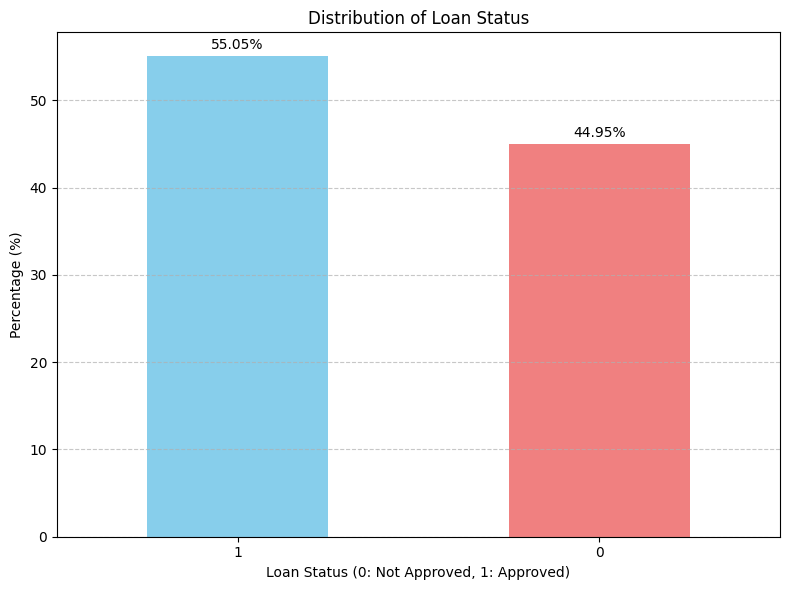

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
loan_status_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for index, value in enumerate(loan_status_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

occupation_status
Employed         69.942
Self-Employed    20.358
Student           9.700
Name: proportion, dtype: float64


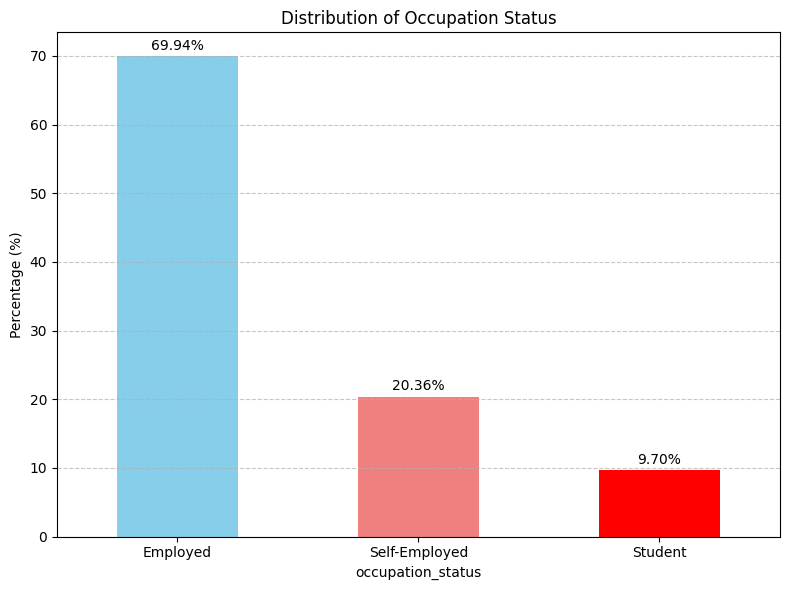

In [18]:
occupation_status_distribution = data['occupation_status'].value_counts(normalize=True) * 100
print(occupation_status_distribution)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
occupation_status_distribution.plot(kind='bar', color=['skyblue', 'lightcoral', 'red'])
plt.title('Distribution of Occupation Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for index, value in enumerate(occupation_status_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

product_type
Credit Card       44.910
Personal Loan     35.046
Line of Credit    20.044
Name: proportion, dtype: float64


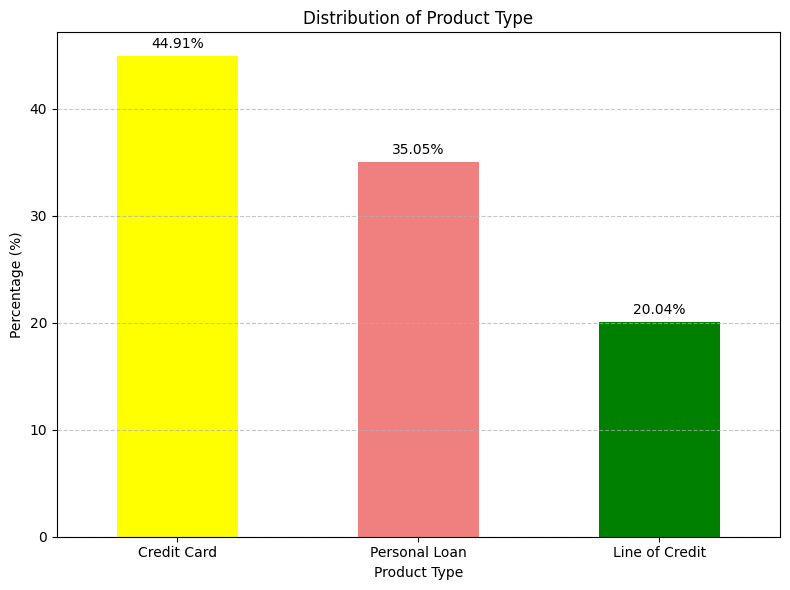

In [19]:
product_type_distribution = data['product_type'].value_counts(normalize=True) * 100
print(product_type_distribution)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
product_type_distribution.plot(kind='bar', color=['yellow', 'lightcoral', 'green'])
plt.title('Distribution of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for index, value in enumerate(product_type_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

loan_intent
Personal              24.858
Education             20.268
Medical               15.196
Business              14.938
Home Improvement      14.906
Debt Consolidation     9.834
Name: proportion, dtype: float64


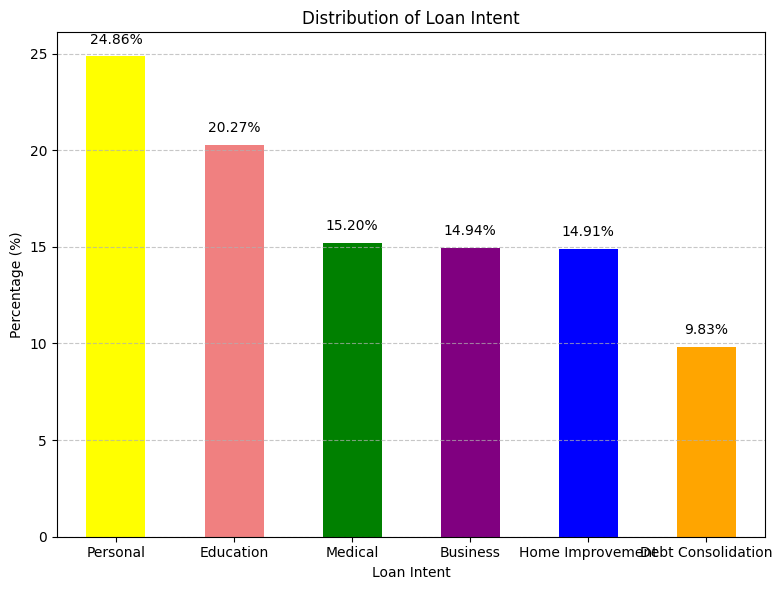

In [20]:
loan_intent_distribution = data['loan_intent'].value_counts(normalize=True) * 100
print(loan_intent_distribution)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
loan_intent_distribution.plot(kind='bar', color=['yellow', 'lightcoral', 'green', 'purple', 'blue','orange'])
plt.title('Distribution of Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for index, value in enumerate(loan_intent_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
data.columns

Index(['age', 'occupation_status', 'years_employed', 'annual_income',
       'credit_score', 'credit_history_years', 'savings_assets',
       'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs',
       'derogatory_marks', 'product_type', 'loan_intent', 'loan_amount',
       'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio',
       'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [22]:
X=data.drop('loan_status',axis=1)
y=data['loan_status']


In [23]:
from sklearn.model_selection import train_test_split

# Split the data (typically 70/30 or 80/20)
# stratify=y ensures the 55/45 Approved/Rejected ratio is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
X_train = pd.get_dummies(X_train, columns=['occupation_status', 'product_type', 'loan_intent'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['occupation_status', 'product_type', 'loan_intent'], drop_first=True)

print("X_train columns after encoding:")
print(X_train.columns)
print("\nX_test columns after encoding:")
print(X_test.columns)

X_train columns after encoding:
Index(['age', 'years_employed', 'annual_income', 'credit_score',
       'credit_history_years', 'savings_assets', 'current_debt',
       'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio',
       'occupation_status_Self-Employed', 'occupation_status_Student',
       'product_type_Line of Credit', 'product_type_Personal Loan',
       'loan_intent_Debt Consolidation', 'loan_intent_Education',
       'loan_intent_Home Improvement', 'loan_intent_Medical',
       'loan_intent_Personal'],
      dtype='object')

X_test columns after encoding:
Index(['age', 'years_employed', 'annual_income', 'credit_score',
       'credit_history_years', 'savings_assets', 'current_debt',
       'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_

# Modeling

### RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply one-hot encoding to categorical features
X_train = pd.get_dummies(X_train, columns=['occupation_status', 'product_type', 'loan_intent'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['occupation_status', 'product_type', 'loan_intent'], drop_first=True)

# Align columns - this is crucial if some categories are present in train but not test, or vice-versa
# Although drop_first=True helps, explicit alignment is safer for consistent feature sets.
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]  # probability of default

# Metrics
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4509
           1       0.92      0.93      0.92      5491

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC: 0.97
Confusion Matrix:
 [[4061  448]
 [ 411 5080]]


##3 Saving the Model

In [28]:
import joblib

# Save trained model
joblib.dump(rf, "rf_loan_default_model.pkl")

# Save the training columns
joblib.dump(list(X_train.columns), "rf_training_columns.pkl")


['rf_training_columns.pkl']

In [29]:
import gradio as gr
import pandas as pd
import joblib

# Load model and training columns
model = joblib.load("rf_loan_default_model.pkl")
train_cols = joblib.load("rf_training_columns.pkl")

# Prediction function
def predict_default(age, income, loan_amount, loan_intent, occupation_status, product_type):
    # Build a single-row dataframe
    input_data = pd.DataFrame([{
        "age": age,
        "income": income,
        "loan_amount": loan_amount,
        "loan_intent": loan_intent,
        "occupation_status": occupation_status,
        "product_type": product_type
    }])

    # Apply one-hot encoding
    input_data = pd.get_dummies(
        input_data,
        columns=["occupation_status", "product_type", "loan_intent"],
        drop_first=True
    )

    # Align with training columns
    for col in train_cols:
        if col not in input_data.columns:
            input_data[col] = 0

    # Arrange columns
    input_data = input_data[train_cols]

    # Predict
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]

    return {
        "Prediction": "DEFAULT" if pred == 1 else "NO DEFAULT",
        "Probability of Default": float(round(prob, 3))
    }


# Build Gradio interface
demo = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Income"),
        gr.Number(label="Loan Amount"),
        gr.Dropdown(["Personal", "Home", "Auto", "Education", "Medical", "Venture"], label="Loan Intent"),
        gr.Dropdown(["Employed", "Unemployed", "Self-employed", "Retired"], label="Occupation Status"),
        gr.Dropdown(["Secured", "Unsecured"], label="Product Type")
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Number(label="Probability of Default")
    ],
    title="Loan Default Prediction - Random Forest",
    description="Enter loan applicant details to predict loan default."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://98c3ba90eafd5fc040.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [32]:
import gradio as gr
import pandas as pd
import joblib

# Load model and saved column structure
model = joblib.load("rf_loan_default_model.pkl")
train_cols = joblib.load("rf_training_columns.pkl")

# Prediction function
def predict_default(age, income, loan_amount, loan_intent, occupation_status, product_type):
    input_data = pd.DataFrame([{
        "age": age,
        "income": income,
        "loan_amount": loan_amount,
        "loan_intent": loan_intent,
        "occupation_status": occupation_status,
        "product_type": product_type
    }])

    # One-hot encode
    input_data = pd.get_dummies(
        input_data,
        columns=["occupation_status", "product_type", "loan_intent"],
        drop_first=True
    )

    # Align with training columns
    for col in train_cols:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[train_cols]

    # Predict
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]

    return (
        "DEFAULT" if pred == 1 else "NO DEFAULT",
        float(round(prob, 3))
    )


# -----------------------------
# 🎨 CUSTOM THEME
# -----------------------------
finance_theme = gr.themes.Monochrome(
    primary_hue="blue",
    secondary_hue="green",
    neutral_hue="slate"
).set(
    body_background_fill="#f7f9fc",  # light banking background
    block_background_fill="#ffffff",
    button_primary_background_fill="#1f4fb2",  # strong deep blue
    button_primary_background_fill_hover="#143786",
    button_secondary_background_fill="#e0b100",  # gold accent
    button_secondary_background_fill_hover="#c89a00",
    input_border_color="#1f4fb2"
)

# -----------------------------
# 🏦 GRADIO INTERFACE
# -----------------------------
demo = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Applicant Age"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Loan Amount Requested"),
        gr.Dropdown(
            ["Personal", "Home", "Auto", "Education", "Medical", "Venture"],
            label="Loan Intent"
        ),
        gr.Dropdown(
            ["Employed", "Unemployed", "Self-employed", "Retired"],
            label="Occupation Status"
        ),
        gr.Dropdown(
            ["Secured", "Unsecured"],
            label="Product Type"
        )
    ],
    outputs=[
        gr.Textbox(label="Prediction Result"),
        gr.Number(label="Probability of Default")
    ],
    title="🏦 Loan Default Risk Predictor",
    description=(
        "A machine learning tool powered by a Random Forest Classifier. "
        "Enter applicant financial details to estimate the risk of loan default. "
        "Use this as a screening aid — not as a sole decision-making tool."
    ),
    theme=finance_theme
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d17e56282ff877f6d5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
